In [1]:
using BasisFunctions
using FrameFuns
using PyPlot

### One-dimensional approximations

In [2]:
f1 = ExpFun( x-> x)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series, mapped to [ -1.0  ,  3.0 ]
Domain: the interval [-1.0, 1.0]


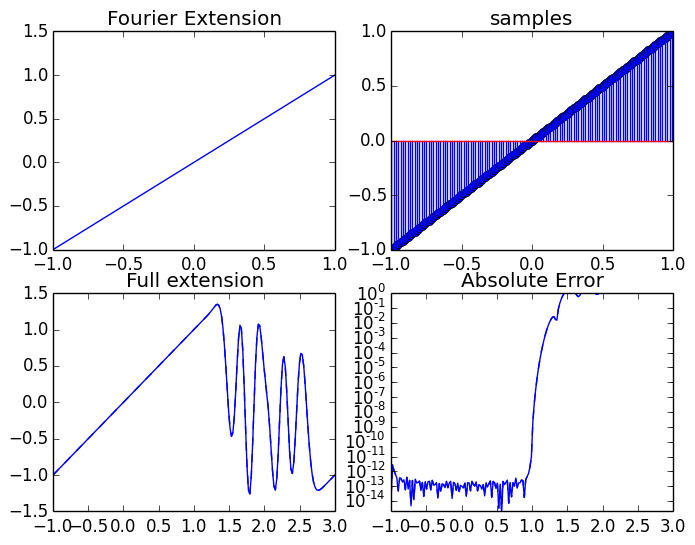

PyObject <matplotlib.text.Text object at 0x322cf2f50>

In [3]:
subplot(221); FrameFuns.plot(f1)
subplot(222); plot_samples(f1)
subplot(223); plot_expansion(f1)
subplot(224); plot_error(f1, x->x)

In [4]:
f1(0.5)

0.499999999999839 + 1.0630385460785874e-13im

In [5]:
f2 = ExpFun( x-> cos(50*x), Interval(-1.0,1.0), n=71)

A 1-dimensional FrameFun with 71 degrees of freedom.
Basis: Fourier series, mapped to [ -1.0  ,  3.0 ]
Domain: the interval [-1.0, 1.0]


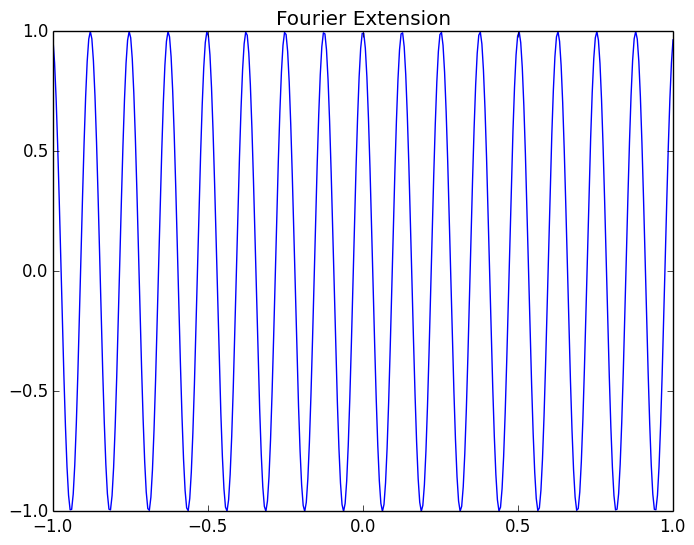

PyObject <matplotlib.text.Text object at 0x3231a3150>

In [6]:
FrameFuns.plot(f2,n=400)

### 2D approximations

##### Simple domains and simple functions

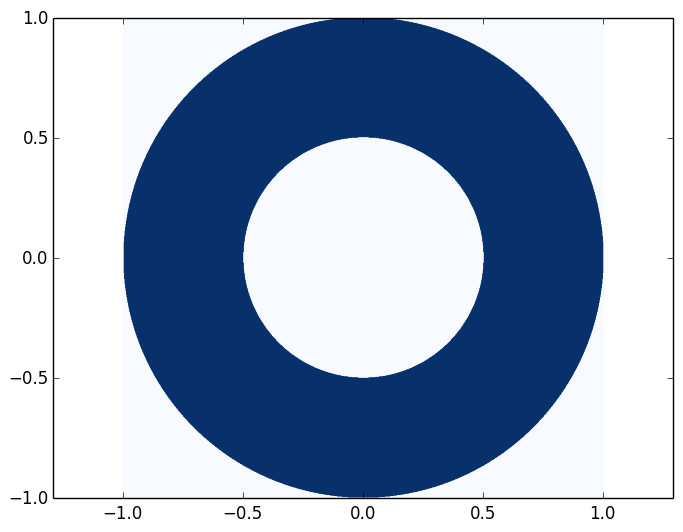

(-1.0,1.0,-1.0,1.0)

In [7]:
C = Disk(1.0)- Disk(0.5); FrameFuns.plot_domain(C, n=1000)

In [8]:
f(x,y) = exp(x+y)

f (generic function with 1 method)

In [9]:
f2 = ExpFun(f,C)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0  ,  3.0 ] x Fourier series, mapped to [ -1.0  ,  3.0 ])
Domain: the difference of two domains: 
    First domain: a circle of radius 1.0 centered at [0.0,0.0]
    Second domain: a circle of radius 1.0 centered at [0.0,0.0]



In [10]:
f2(0.1, 0.4)

1.6487212713599653 + 4.0488507851987876e-8im

In [11]:
exp(0.1+0.4)

1.6487212707001282

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/mpl_toolkits/mplot3d/axes3d.py:1849: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[which_pt] = np.array(verts[i,0]) - np.array(verts[i,1])
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/mpl_toolkits/mplot3d/axes3d.py:1850: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[which_pt] = np.array(verts[i,1]) - np.array(verts[i,2])


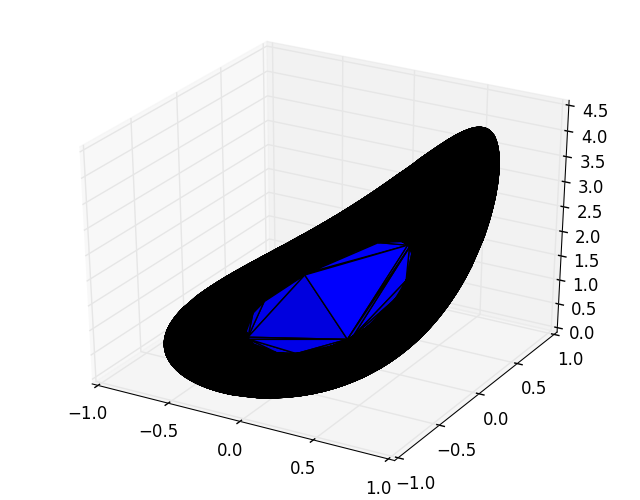

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x329205d10>

In [12]:
FrameFuns.plot(f2)

In [13]:
FrameFuns.set(FrameFuns.expansion(f2))

FrameFuns.DomainFrame{FrameFuns.DomainDifference{2,Float64,FrameFuns.Disk{Float64},FrameFuns.Disk{Float64}},BasisFunctions.TensorProductSet{Tuple{BasisFunctions.LinearMappedSet{BasisFunctions.FourierBasis{false,Complex{Float64}},Float64,Complex{Float64}},BasisFunctions.LinearMappedSet{BasisFunctions.FourierBasis{false,Complex{Float64}},Float64,Complex{Float64}}},(1,1),2,2,Complex{Float64}},2,Complex{Float64}}(the difference of two domains: 
    First domain: a circle of radius 1.0 centered at [0.0,0.0]
    Second domain: a circle of radius 1.0 centered at [0.0,0.0]
,BasisFunctions.TensorProductSet{Tuple{BasisFunctions.LinearMappedSet{BasisFunctions.FourierBasis{false,Complex{Float64}},Float64,Complex{Float64}},BasisFunctions.LinearMappedSet{BasisFunctions.FourierBasis{false,Complex{Float64}},Float64,Complex{Float64}}},(1,1),2,2,Complex{Float64}}((BasisFunctions.LinearMappedSet{BasisFunctions.FourierBasis{false,Complex{Float64}},Float64,Complex{Float64}}(BasisFunctions.FourierBasis{fals

##### Simple domains and harder functions

In [14]:
dom = FrameFuns.randomcircles(10)

a collection of 10 domains

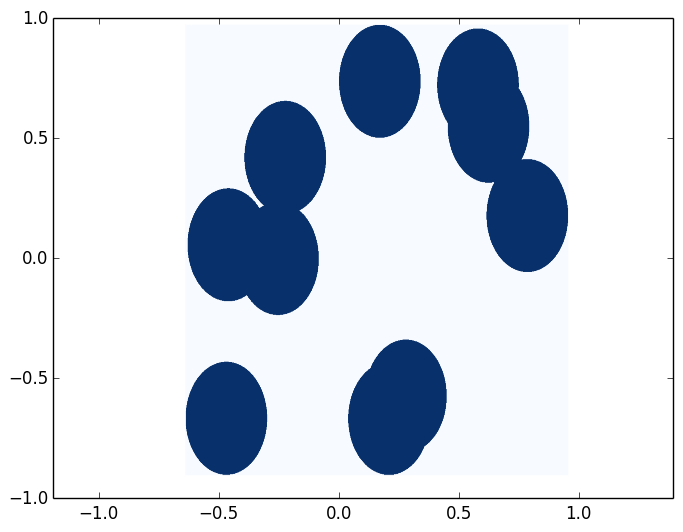

(-0.8,1.0,-1.0,1.0)

In [15]:
FrameFuns.plot_domain(dom,n=1000); axis("equal")

In [16]:
@time f2 = ExpFun( (x,y) -> cos(40*(x+y)), dom, dof=100, method="lsqr")

 88

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -0.6411285533668625  ,  2.5458874155685667 ] x Fourier series, mapped to [ -0.9050723985005633  ,  2.8425107993126937 ])
Domain: a collection of 10 domains


In [17]:
plot(f2)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[17], in expression starting on line 1

In [18]:
plot_extension(f2)

LoadError: LoadError: UndefVarError: plot_extension not defined
while loading In[18], in expression starting on line 1

In [19]:
FrameFuns.domain(dom,1)

.126204 seconds (1.44 M allocations: 311.409 MB, 0.26% gc time)


a circle of radius 0.2 centered at [0.7517072859280362,-0.7050723985005632]

##### Fractal domains

In [20]:
mandelbrot = Mandelbrot()

LoadError: LoadError: UndefVarError: Mandelbrot not defined
while loading In[20], in expression starting on line 1

In [21]:
plot(mandelbrot, n=201)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[21], in expression starting on line 1

In [22]:
f1 = ExpFun( (x,y) -> cos(x*y), mandelbrot)

LoadError: LoadError: UndefVarError: mandelbrot not defined
while loading In[22], in expression starting on line 1

In [23]:
plot(f1)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[23], in expression starting on line 1

In [24]:
plot_extension(f1)

LoadError: LoadError: UndefVarError: plot_extension not defined
while loading In[24], in expression starting on line 1

In [25]:
julia = JuliaSet()

LoadError: LoadError: UndefVarError: JuliaSet not defined
while loading In[25], in expression starting on line 1

In [26]:
plot(julia, n=200)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[26], in expression starting on line 1

In [27]:
f2 = ExpFun( (x,y) -> cos(10*x*y), julia, dof=31)

LoadError: LoadError: UndefVarError: julia not defined
while loading In[27], in expression starting on line 1

In [28]:
plot(f2)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[28], in expression starting on line 1

In [29]:
plot_accuracy(f2, (x,y) -> cos(10*x*y))

LoadError: LoadError: UndefVarError: plot_accuracy not defined
while loading In[29], in expression starting on line 1

In [30]:
plot_extension(f2)

LoadError: LoadError: UndefVarError: plot_extension not defined
while loading In[30], in expression starting on line 1

### 3D approximations

##### Simple domains and simple functions

In [31]:
S = Sphere(1.0)

LoadError: LoadError: UndefVarError: Sphere not defined
while loading In[31], in expression starting on line 1

In [32]:
plot(S)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[32], in expression starting on line 1

In [33]:
f3 = ExpFun( (x,y,z) -> cos(x-2y+3z), Sphere(1.0), dof=5)

LoadError: LoadError: UndefVarError: Sphere not defined
while loading In[33], in expression starting on line 1

In [34]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[34], in expression starting on line 1

In [35]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[35], in expression starting on line 1

##### Harder domains

In [36]:
atom = atomium()

LoadError: LoadError: MethodError: `+` has no method matching +(::FixedSizeArrays.Vec{3,Float64}, ::Array{Float64,1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +{S,T}(!Matched::Range{S}, ::AbstractArray{T,N})
  +(!Matched::SparseMatrixCSC{Tv,Ti<:Integer}, ::Array{T,N})
  ...
while loading In[36], in expression starting on line 1

In [37]:
plot(atomium, n=50)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[37], in expression starting on line 1

In [38]:
f3 = ExpFun( (x,y,z) -> cos(x+y-2*z), atomium, dof=5)

LoadError: LoadError: MethodError: `numtype` has no method matching numtype(::Function)
while loading In[38], in expression starting on line 1

In [39]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[39], in expression starting on line 1

In [40]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[40], in expression starting on line 1

##### Harder functions?

In [41]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=21, method="lsqr")

LoadError: LoadError: UndefVarError: unitsphere not defined
while loading In[41], in expression starting on line 1

In [42]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[42], in expression starting on line 1

In [43]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=51, method="lsqr")

LoadError: LoadError: UndefVarError: unitsphere not defined
while loading In[43], in expression starting on line 1